# 2. ベースライン補正
ベースラインの補正にはPybaselinesを利用


インストールはPyPyなら
```
pip install pybaselines
```

Condaなら
```
conda install -c conda-forge pybaselines
```

詳しくは公式ドキュメントをどうぞ

Pybaselines:[https://pybaselines.readthedocs.io/en/latest/index.html](https://pybaselines.readthedocs.io/en/latest/index.html)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pybaselines.whittaker import *
from pybaselines.morphological import rolling_ball
import os
from sklearn.metrics import mean_squared_error

,cell_4,cell_1,cell_2,cell_3
601.000000,-0.158122,11.751628,-0.157717,0.766680
601.499750,0.054055,11.936149,0.069996,1.109963
601.999500,-0.027863,11.827116,0.004163,1.130085
602.499250,-0.456433,11.371970,-0.407776,0.786064
602.998999,0.263706,12.066068,0.329533,1.578924
...,...,...,...,...
1598.001001,1.285276,2.514009,-0.766173,9.681109
1598.500750,1.578017,2.810025,-0.438041,9.979850
1599.000500,1.673250,2.908459,-0.307464,10.081019
1599.500250,1.740091,2.978428,-0.205327,10.153734


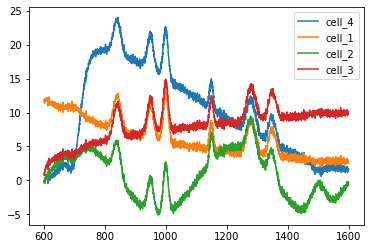

In [2]:
path = './output/1_subtract_background/spectrum.csv'
spectrum = pd.read_csv(path,index_col=0)
display(spectrum)
plt.plot(spectrum,label=spectrum.columns)
plt.legend()
plt.show()

# ベースライン補正アルゴリズムを適用

methods=[airpls,arpls,asls,aspls,derpsalsa,drpls,iarpls,iasls,psalsa,rolling_ball]

今回はasls(ALS)とローリングボールを含めた9種類のアルゴリズムであり，全てデフォルトのパラメータで適用．

アルゴリズムは[こちら](https://pybaselines.readthedocs.io/en/latest/algorithms/index.html),関数使用は[こちら](https://pybaselines.readthedocs.io/en/latest/api/index.html)


模擬データのため，付与したベースラインを取得可能．

正しいベースラインと推定したベースラインの二乗誤差をヒストグラムで出力．

ベースラインの形状によって最適な補正手法は異なるが，このサンプルではpsalsa(Peaked Signal's Asymmetric Least Squares Algorithm)が有力．

Corrected... cell_4
Corrected... cell_1
Corrected... cell_2
Corrected... cell_3


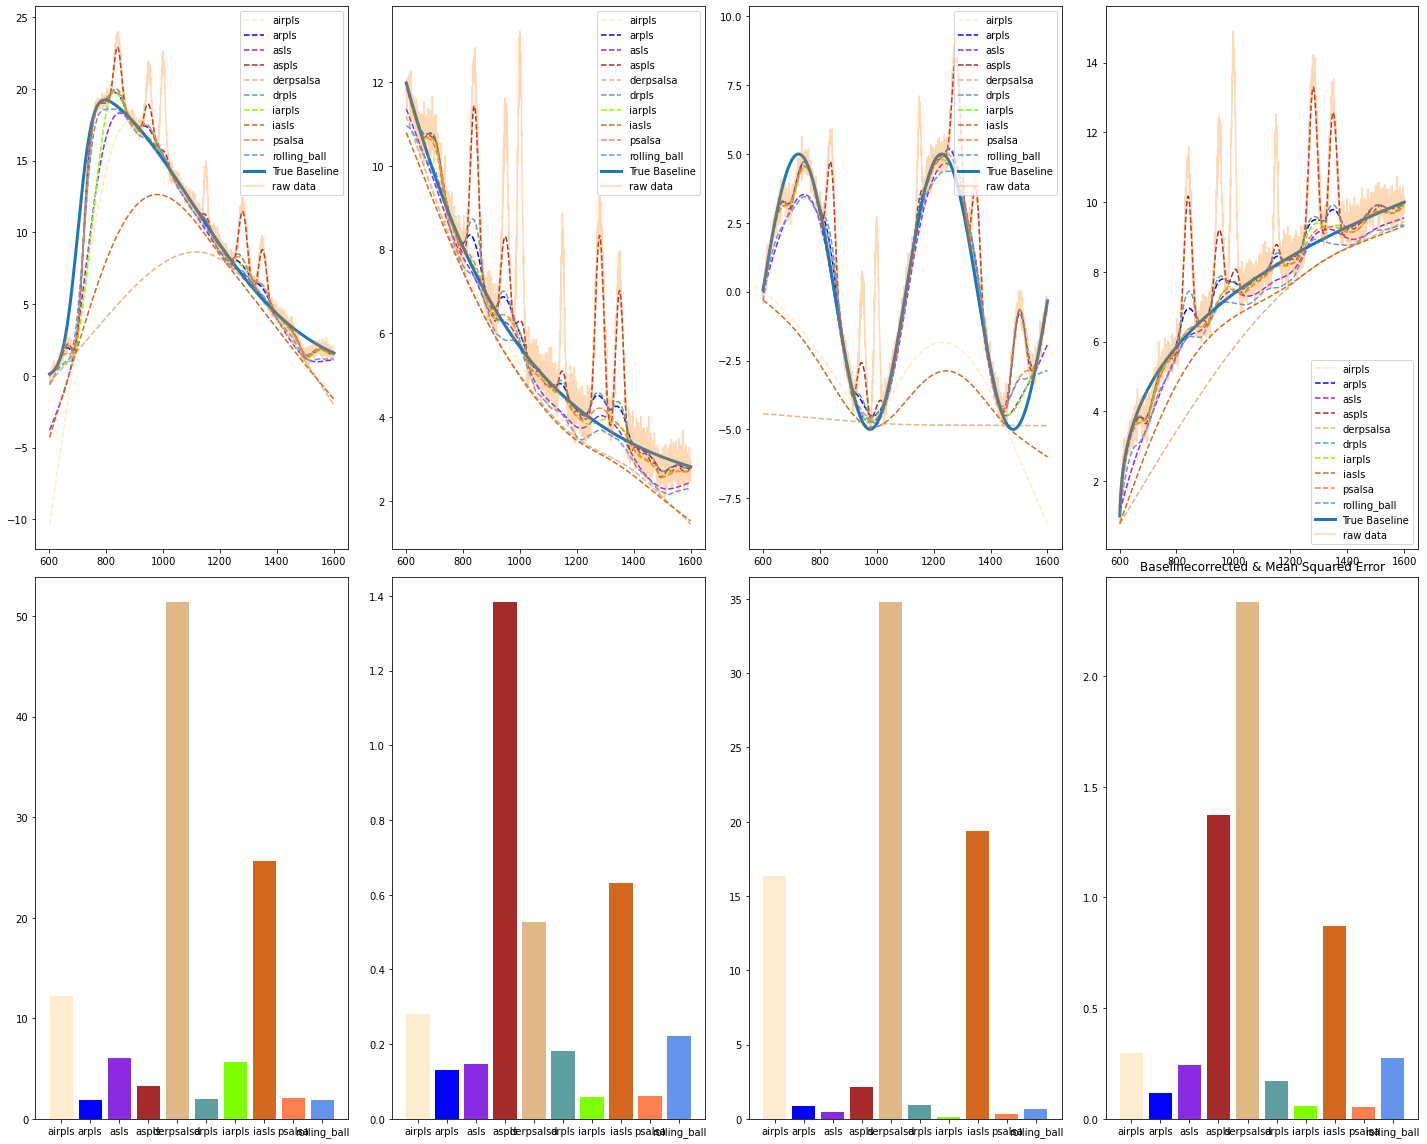

,cell_3_rolling_ball,cell_3_psalsa,cell_3_iasls,cell_3_iarpls,cell_3_drpls,cell_3_derpsalsa,cell_3_aspls,cell_3_asls,cell_3_arpls,cell_3_airpls,...,cell_4_rolling_ball,cell_4_psalsa,cell_4_iasls,cell_4_iarpls,cell_4_drpls,cell_4_derpsalsa,cell_4_aspls,cell_4_asls,cell_4_arpls,cell_4_airpls
601.000000,-0.372132,-0.626860,-0.026400,-0.613445,-0.608734,-0.006418,-4.861010e-01,-0.369830,-0.660158,-0.293534,...,0.472633,-0.104665,4.128631,-0.200240,-0.191398,0.324798,-1.977511e-01,3.623275,-0.161901,10.178037
601.499750,-0.057168,-0.313921,0.305558,-0.304997,-0.305730,0.330054,-1.993309e-01,-0.041632,-0.353180,0.036393,...,0.665620,0.092520,4.308982,0.002127,0.007925,0.525541,2.523640e-10,3.811086,0.037104,10.323568
601.999500,-0.065119,-0.324139,0.314355,-0.319703,-0.325874,0.343365,-2.356611e-01,-0.036594,-0.369357,0.043160,...,0.564675,-0.004390,4.195238,-0.089600,-0.086844,0.432188,-9.629316e-02,3.704801,-0.057986,10.175002
602.499250,-0.436969,-0.698492,-0.040990,-0.698537,-0.710133,-0.007467,-6.359624e-01,-0.395699,-0.749659,-0.314216,...,0.117243,-0.447950,3.734843,-0.527974,-0.528257,-0.007816,-5.391600e-01,3.251865,-0.499724,9.679786
602.998999,0.328308,0.064049,0.740546,0.059538,0.042542,0.778582,1.009537e-01,0.382079,0.006950,0.465290,...,0.818684,0.257199,4.423156,0.182369,0.179051,0.700889,1.668334e-01,3.947637,0.207252,10.333279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598.001001,0.340049,-0.179380,0.374200,-0.235934,-0.289161,0.249345,-2.872810e-01,0.135060,-0.274537,0.175873,...,0.116275,-0.241690,2.877238,-0.235623,-0.288783,3.247841,-2.872125e-01,0.160738,-0.274653,2.855890
1598.500750,0.638790,0.116084,0.671413,0.057749,0.006068,0.546083,5.329071e-15,0.432290,0.020895,0.473188,...,0.409051,0.054639,3.181851,0.058386,0.006424,3.555542,6.661338e-16,0.451811,0.021159,3.161830
1599.000500,0.739959,0.213974,0.771053,0.153849,0.103710,0.645249,8.948123e-02,0.531948,0.118746,0.572930,...,0.504318,0.153455,3.288954,0.154874,0.104107,3.665733,8.947458e-02,0.545375,0.119453,3.270261
1599.500250,0.812675,0.283409,0.842241,0.221491,0.172891,0.715962,1.503947e-01,0.603152,0.188139,0.644219,...,0.571195,0.223878,3.367667,0.222967,0.173391,3.747535,1.504439e-01,0.610549,0.189353,3.350302


In [3]:
#適用したい関数をリストにまとめておく
methods = [airpls,arpls,asls,aspls,derpsalsa,drpls,iarpls,iasls,psalsa,rolling_ball]
methods_str =  [method.__name__ for method in methods]#
colors = ['#FFEBCD', '#0000FF', '#8A2BE2', '#A52A2A', '#DEB887', '#5F9EA0', '#7FFF00', '#D2691E', '#FF7F50', '#6495ED', '#FFF8DC', '#DC143C', '#00FFFF', '#00008B', '#008B8B', '#B8860B', '#A9A9A9', '#006400', '#A9A9A9', '#BDB76B', '#8B008B', '#556B2F', '#FF8C00', '#9932CC', '#8B0000', '#E9967A', '#8FBC8F', '#483D8B', '#2F4F4F', '#2F4F4F', '#00CED1', '#9400D3']

fig = plt.figure(figsize=(20,16))
corrected_spectra = pd.DataFrame(index=spectrum.index)
for i,cell_name in enumerate(spectrum.columns):
    print(f"Corrected... {cell_name}")
    ax_baseline = fig.add_subplot(2,4,i+1)

    y = spectrum[cell_name]
    x = spectrum.index
    
    #True baselineの読み込み
    path = f"./simulated_spectrum/true_baselines/{cell_name}.asc"
    true_baseline = pd.read_csv(path,index_col=0,sep="\t")
    
    mses = []
    for j,method in enumerate(methods):
        estimated_background = method(y)[0]
        mses.append(mean_squared_error(true_baseline,estimated_background))
        ax_baseline.plot(x,estimated_background, '--', label=method.__name__,color=colors[j])
        corrected_spectra.insert(0,f"{cell_name}_{method.__name__}",y-estimated_background)
        
    ax_baseline.plot(true_baseline, lw=3, label='True Baseline')
    ax_baseline.plot(x, y, label='raw data', lw=1.5,alpha=0.3)
    ax_baseline.legend()
    
    ax_err = fig.add_subplot(2,4,i+1+4)
    ax_err.bar(methods_str,mses, lw=3,color=colors)

    
plt.tight_layout()
plt.title("Baselinecorrected & Mean Squared Error")
plt.savefig("./output/2_correct_baseline/result.png")
plt.show()

display(corrected_spectra)

In [4]:
corrected_spectra.to_csv("./output/2_correct_baseline/spectra.csv")